In [1]:
# Laura Burdick (lburdick@umich.edu)
# Get average stability for each language

In [2]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# SET THESE VARIABLES

# Location where stability for each word in each language of the Bible is
# stored (calculated using stability/stability_bible.py).
# Files should have the format
# {output_path}{language}.csv,
# where the csv file has columns "word" and "stability",
# and the stability value is recorded for each word.
bible_path = '../corpus/w2v/stability/'

# List of Bible languages (can adjust if needed, or leave the same)
bible_languages = ['Czech.txt', 'Gujarati-NT.txt', 'Quichua-NT.txt', 'Farsi.txt', 'Indonesian.txt', 'German.txt', 'Norwegian.txt', 'Arabic.txt', 'Tuareg-PART.txt', 'Japanese.txt', 'Serbian.txt', 'Amuzgo-NT.txt', 'Potawatomi-PART.txt', 'Malayalam.txt', 'Thai-tok.txt', 'Esperanto.txt', 'Wolof-NT.txt', 'Campa-NT.txt', 'Aukan-NT.txt', 'Swedish.txt', 'Bulgarian.txt', 'Chinese-tok.txt', 'Basque-NT.txt', 'Mam-NT.txt', 'Turkish.txt', 'Wolaytta-NT.txt', 'English-WEB.txt', 'Shuar-NT.txt', 'Coptic-NT.txt', 'Ukranian-NT.txt', 'Finnish.txt', 'Chinese.txt', 'Chamorro-PART.txt', 'Aguaruna-NT.txt', 'Vietnamese.txt', 'Kannada.txt', 'Lukpa-NT.txt', 'Lithuanian.txt', 'Hindi.txt', 'Somali.txt', 'Latvian-NT.txt', 'Slovene.txt', 'Russian.txt', 'Syriac-NT.txt', 'Danish.txt', 'French.txt', 'Nepali.txt', 'Xhosa.txt', 'Japanese-tok.txt', 'Maori.txt', 'Tagalog.txt', 'Camsa-NT.txt', "K'iche'-NT-SIL.txt", "K'iche'-NT.txt", 'Uma-NT.txt', 'Cebuano.txt', 'Achuar-NT.txt', 'Zulu-NT.txt', 'Dinka-NT.txt', 'Cakchiquel-NT.txt', 'Cherokee-NT.txt', 'Shona.txt', 'Gaelic-PART.txt', 'Nahuatl-NT.txt', 'Latin.txt', 'Zarma.txt', 'Ojibwa-NT.txt', 'Ewe-NT.txt', 'Estonian-PART.txt', "Q'eqchi'.txt", 'English.txt', 'Amharic.txt', 'Swahili-NT.txt', 'Cabecar-NT.txt', 'Albanian.txt', 'Romani-NT.txt', 'Afrikaans.txt', 'Tachelhit-NT.txt', 'Galela-NT.txt', 'Barasana-NT.txt', 'Armenian-PART.txt', 'Paite.txt', 'Uspanteco-NT.txt', 'Icelandic.txt', 'Hungarian.txt', 'Romanian.txt', 'Akawaio-NT.txt', 'Spanish.txt', 'Kabyle-NT.txt', 'Chinantec-NT.txt', 'Thai.txt', 'Greek.txt', 'Italian.txt', 'Marathi.txt', 'Myanmar.txt', 'Manx-PART.txt', 'Portuguese.txt', 'Vietnamese-tok.txt', 'Hebrew.txt', 'Jakalteko-NT.txt', 'Dutch.txt', 'Malagasy.txt', 'Korean.txt', 'Croatian.txt', 'Telugu.txt', 'Slovak.txt', 'Polish.txt', 'Creole.txt']
# Location where stability for each word in each language of Wikipedia is
# stored (calculated using stability/stability_wikipedia.py).
# Files should have the format
# {output_path}{language}_downsampled_without_replacement_glove_stability.csv,
# where the csv file has columns "word" and "stability",
# and the stability value is recorded for each word.
wiki_path = '../../embedding_datasets/polyglot/'

# List of Wikipedia languages (can adjust if needed, or leave the same)
wiki_languages = languages=['ar','bg','ca','cs','da','de','el','en','es','et','fa','fi','fr','he','hi','hr','hu','id','it','ja','ko','lt','lv','ms','nl','no','pl','pt','ro','ru','sk','sl','sr','sv','th','tl','tr','uk','vi','zh']

# Location to save output average stabilities
# File will have be formatted as a csv file with columns "language" and
# "averageStability", where language is the Bible code for the language
# and averageStability is the average stability of that language
output_path = '../corpus/average_stabilities_allLanguages.csv'


In [12]:
# First, calculate average stabilities for Bible
average_stabilities = {} #key: abbrev. Bible language, values: avg. stability
for bible_language in bible_languages:
    stability = pd.read_csv(bible_path+bible_language[:-4]+'.csv')
    average_stability = sum(stability.stability)/len(stability)
    language = bible_language[:3].lower() #abbrev. Bible language
    if language in average_stabilities:
        # If there is more than one translation in a language,
        # take one with highest stability
        if average_stability > average_stabilities[language]:
            average_stabilities[language] = average_stability
    else:
        average_stabilities[language] = average_stability

In [13]:
# Read in mapping between Bible language names and Wikipedia language names
mapping_file = pd.read_csv('multilingual_corpora.csv')
mapping = {} #key: Wikipedia language code, values: Bible language code
for it,row in mapping_file.iterrows():
    if len(str(row['Identifier'])) > 2:
        continue
    mapping[row['Identifier']] = row['ISO 639-3 Code']
mapping['ca'] = 'cat' # Some additional manual mappings
mapping['fa'] = 'fas'
mapping['id'] = 'ind'
mapping['ja'] = 'jpn'
mapping['lv'] = 'lav'
mapping['ms'] = 'may'
mapping['sl'] = 'slv'
mapping['ar'] = 'arb'
mapping['zh'] = 'mnd'

In [ ]:
# Now, calculate average stabilities for Wikipedia
for language in wiki_languages:
    stability = pd.read_csv(wiki_path+language+'_downsampled_without_replacement_glove_stability.csv')
    mapped_language = mapping[language]
    average_stability = sum(stability.stability)/len(stability)
    if mapped_language in average_stabilities:
        average_stabilities[mapped_language] = (average_stabilities[mapped_language]+average_stability) / 2
    else:
        average_stabilities[mapped_language] = average_stability

In [15]:
# Save average stabilities
stabilities = pd.DataFrame(data={'language':list(average_stabilities.keys()),'averageStability':[average_stabilities[i] for i in average_stabilities.keys()]})
stabilities.to_csv(output_path)


# Get graph of stability buckets for different words

In [267]:
# Names of csv files for different languages that are to be plotted
bible_language1 = 'hi.csv'
bible_language2 = 'bg.csv'
bible_language3 = 'ar.csv'
bible_language4 = 'en.csv'


In [268]:
stability1 = pd.read_csv(bible_path+bible_language1)
stability1 = stability1.rename(columns={'stability':'Hindi'})
stability1['Hindi']/=10
stability2 = pd.read_csv(bible_path+bible_language2)
stability2 = stability2.rename(columns={'stability':'Bulgarian'})
stability2['Bulgarian']/=10
stability3 = pd.read_csv(bible_path+bible_language3)
stability3 = stability3.rename(columns={'stability':'Arabic'})
stability3['Arabic']/=10
stability4 = pd.read_csv(bible_path+bible_language3)
stability4 = stability4.rename(columns={'stability':'English'})
stability4['English']/=10

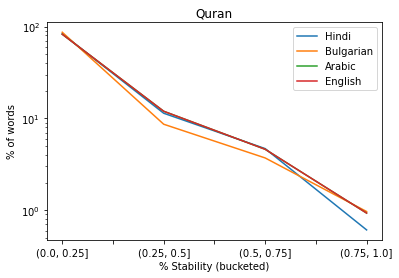

In [266]:
df1 = pd.cut(stability1['Hindi'], bins=np.linspace(0, 1, 5)).value_counts(sort=False)
df1 /= df1.sum()/100
ax = df1.plot(logy=True,ylabel='% of words',xlabel='% Stability (bucketed)',legend=True)
df2 = pd.cut(stability2['Bulgarian'], bins=np.linspace(0, 1, 5)).value_counts(sort=False)
df2 /= df2.sum()/100
df2.plot(logy=True, title=bible_language2[:-4],ylabel='% of words',xlabel='% Stability (bucketed)',legend=True,ax=ax)
df3 = pd.cut(stability3['Arabic'], bins=np.linspace(0, 1, 5)).value_counts(sort=False)
df3 /= df3.sum()/100
p = df3.plot(logy=True, title='Quran',ylabel='% of words',xlabel='% Stability (bucketed)',legend=True,ax=ax)
df4 = pd.cut(stability4['English'], bins=np.linspace(0, 1, 5)).value_counts(sort=False)
df4 /= df4.sum()/100
p = df4.plot(logy=True, title='Quran',ylabel='% of words',xlabel='% Stability (bucketed)',legend=True,ax=ax)
fig = p.get_figure()
fig.savefig("quran.png")